### Exercise¶
carprices file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib

#### Read the carprices file

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


#### Handling the Categorical variable (Car Model)

In [4]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


#### concate the original data with the dummies columnes

In [5]:
new_df = pd.concat([df, dummies], axis=1)
new_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


#### Drop Car Model Column and one dummy column to avoid trapped in dummy variable trap

In [6]:
new_df.drop(['Car Model','Mercedez Benz C class'], axis=1, inplace=True)
new_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


why I drop one dummy column?

* Because dummy variable trap as if we add all the three 
features in this equation, machine learning algorithm will be confused to 
give weightage to each coefficient as they are dependent on each other 

* If we increase weightage of one variable then weightage of other
two will be affected (will decease) and most of the computation
will be consumed to iteratively calculate the weig

* The Dummy Variable trap is a scenario in which the independent
variables are multicolinear - a scenario in which two or more variables are highly correlated

* Solution to this problem is to remove one feature after
using OneHotEncoder technique i.e If we are having 10 unique
values for the particular column then use 9 and drop one column.

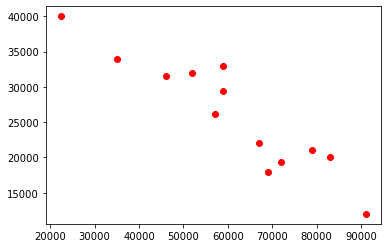

In [10]:
plt.scatter(new_df['Mileage'], df['Sell Price($)'], c='red')
plt.show()

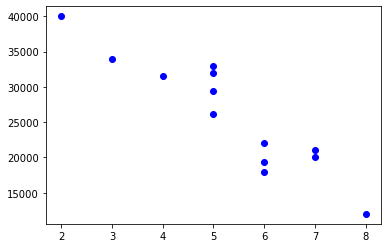

In [9]:
plt.scatter(new_df['Age(yrs)'], df['Sell Price($)'], c='b')

By visualizing Linear Regression can be applied

#### Assigning Features and target variables

In [11]:
X = new_df.drop('Sell Price($)', axis=1)
y = new_df['Sell Price($)']
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [12]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

#### Bukding and Training Linear Regression Model

In [13]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

#### Score on the Training data

In [14]:
model.score(X,y)

0.9417050937281083

predict the following:

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [15]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [16]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

#### Assigning the Parametes theta_0, theta_1, theta_2, theta_3, theta_4

In [19]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]
theta_2 = model.coef_[1]
theta_3 = model.coef_[2]
theta_4 = model.coef_[3]

print(f"theta_0 = {theta_0}\ntheta_1 = {theta_1}\ntheta_2 = {theta_2}\ntheta_3 = {theta_3}\ntheta_4 = {theta_4}")

theta_0 = 58976.625968537235
theta_1 = -0.37012209438835403
theta_2 = -1332.4536276121187
theta_3 = -2453.540737262269
theta_4 = -6738.207325663312


#### define the hypothesis function

In [20]:
def hypothesis_fun(x1,x2,x3,x4):
    return theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3 + theta_4 * x4

#### test the hypothesis function

In [21]:
hypothesis_fun(45000,4,0,0)

36991.31721061283

In [22]:
hypothesis_fun(86000,7,0,1)

11080.743132190644

#### save the model

In [23]:
joblib.dump(model, 'car prices prediction')

['car prices prediction']

#### Load the model

In [25]:
mj = joblib.load('car prices prediction')

#### test the model after loading it

In [26]:
mj.predict([[72000,5,1,0]])

array([23212.02629725])

In [27]:
mj.predict([[42000,5,1,0]])

array([34315.6891289])